In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.stats as stats

In [12]:
np.set_printoptions(threshold=sys.maxsize)

spike_data = np.loadtxt("DataSetCoursework_DHA.txt", dtype=int)
n,m = spike_data.shape
spikes = spike_data[:,0:m-1]
trial_num = np.zeros((n, 1))
trial_num = spike_data[:,m-1]

window_size = 0.2
bin_size = 0.01
window_steps = round(window_size/bin_size)

times = np.arange(0, n*bin_size, bin_size)


rates = np.zeros((n, m-1))

for i in range(n):
    if i > (n - window_steps +1):
        rates[i] = rates[n - window_steps +1]
    else:
        rates[i] = sum(spikes[i:i + window_steps,:])
        rates[i] = rates[i] / window_size

rates = np.insert(rates, 6, trial_num, axis=1)

print('********************rates*************************')
print(rates)

********************rates*************************
[[  5.   5.   0.   0.   0.   5.   1. 400.]
 [  5.   5.   0.   0.   0.   5.   1. 400.]
 [  5.   5.   0.   0.   0.   5.   1. 400.]
 [  5.   5.   0.   0.   0.   5.   1. 400.]
 [  5.   5.   0.   0.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   5.   1. 400.]
 [  5.   5.   0.   5.   0.   0.   1. 400.]
 [  5.   5.   0.   5.   0.   0.   1. 400.]
 [  5.   5.   0.   5.   0.   0.   1. 400.]
 [  5.   5.   0.   5.   0.   0.   1. 400.]
 [  0.   0.   0.   5.   0.   0.   1. 400.]
 [  0.   0.   0.   5.   0.   0.   1. 400.]
 [ 

-------------------------------Spikes Plotting--------------------------------------


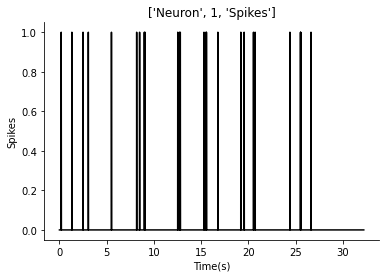

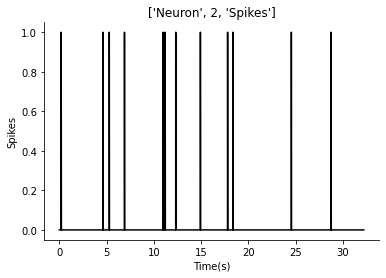

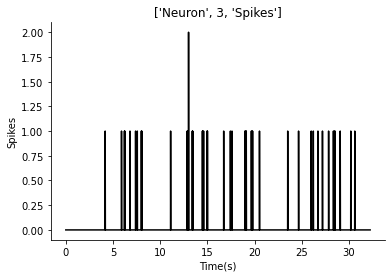

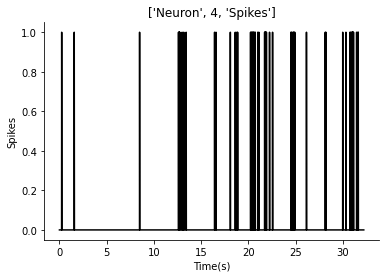

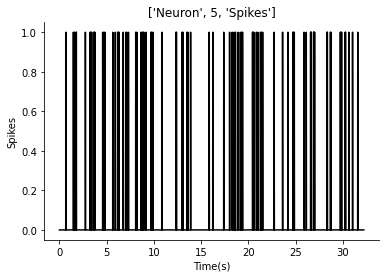

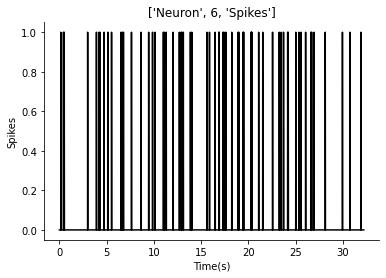

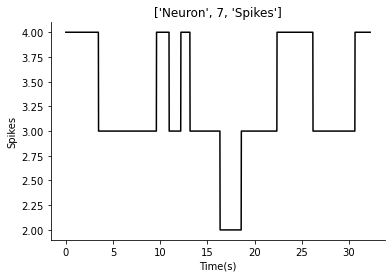

In [13]:
#Plotting Spikes and rates

#Spikes

print('-------------------------------Spikes Plotting--------------------------------------')
for i in range(spikes.shape[1]):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.ylabel('Spikes')
    plt.xlabel('Time(s)')
    plt.title(['Neuron', i+1, 'Spikes'])
    plt.plot(times, spikes[:, i], 'black')
    plt.show()



-------------------------------Rates Plotting--------------------------------------


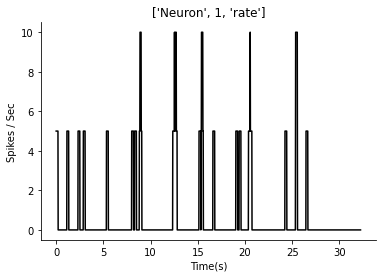

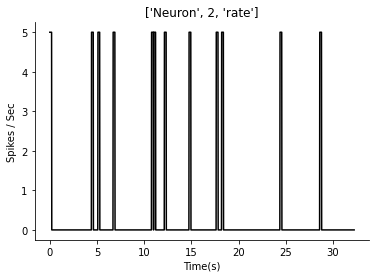

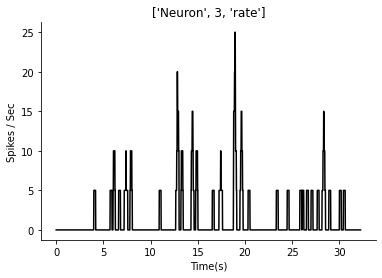

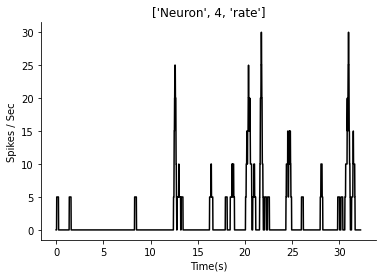

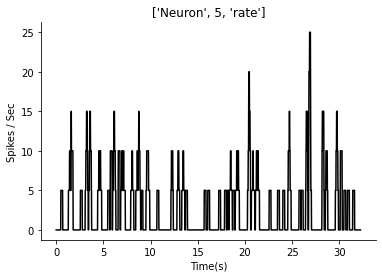

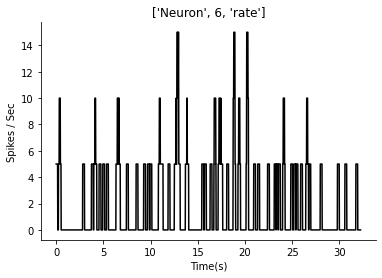

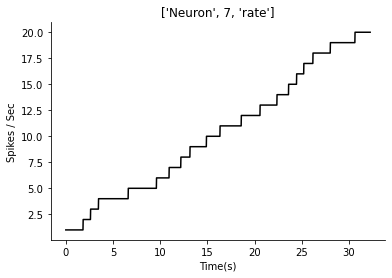

In [19]:
print('-------------------------------Rates Plotting--------------------------------------')
    
#Rates
for i in range(spikes.shape[1]):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.xlabel('Time(s)')
    plt.ylabel('Spikes / Sec')
    plt.title(['Neuron', i+1, 'rate'])
    plt.plot(times, rates[:, i], 'black')
    plt.show()


In [5]:
# limits = np.array([0, 139, 298, 408, 696, 842, 999, 1238, 1354])

# for j in range(0,limits.size-1):
    
#     print('********trial',j+1,'*********')
#     for i in range(6):
#         print('neuron', i+1)
#         correlation_values = np.corrcoef(spike_data[limits[j]:limits[j+1], i:i+1], rates[limits[j]:limits[j+1], i:i+1], rowvar=False)
#         print(correlation_values[0,1])

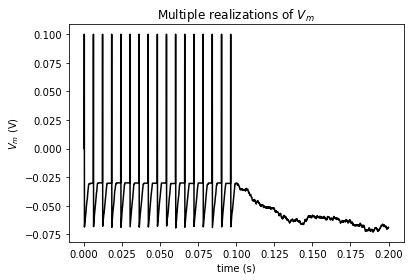

In [6]:
    spikes = rates[:, i]

    tau = 0.020 
    R = 3e7
    U_rest = -0.07
    theta = -0.030
    dt = 0.0001
    T = 0.2
    arp = 0.006
    backgroundI=3e-9
    U_0=0.3
    I_0=U_0/R
    spikeVolt=0.1 
    I_0 = 1e-8   
    psc = np.arange(0., 0.1, dt) 
    
#model
    n_pcs = len(psc)
    index_pscs = np.round((psc / dt), decimals=1)
    n_steps = round(T / dt)
    U = np.zeros(n_steps + 1)                     
    U_plot = np.zeros(n_steps + 1)                
    U[1] = U_rest
    U_plot[1]=U_rest
    I = np.zeros(n_steps + 1)                  
    t_spike = spikes
    n_spikes = 0
    time = np.linspace(0, T, n_steps + 1)
    randI = backgroundI * np.random.randn(1, n_steps)

#simulation

    for i in range(n_steps):              
        for k in range(n_pcs):        
            if i == index_pscs[k]:  
                I[i] += I_0
        
        dU = (dt/tau) * (U_rest - U[i] + I[i] * R +  randI[0][i]*R)
        U[i+1] = U[i] + dU
        U_plot[i+1]=U[i+1]
              
    #spikes
        if (U[i+1] > theta):
            if (n_spikes>0):
                
                if (time[i]>=(t_spike+arp)):
                    U_plot[i+1] = spikeVolt
                    U[i+1] = U_rest      
                    t_spike = time[i]       
                    n_spikes = n_spikes + 1
                    
                else:
                    U[i+1] = U[i]
                    U_plot[i+1]=U[i+1]
                    
            else:
                U_plot[i+1] = spikeVolt
                U[i+1] = U_rest
                t_spike = time[i]          
                n_spikes = n_spikes+1
      



    #plotting
    plt.figure()
    plt.plot(time, U_plot, color='k') 
    plt.title('Multiple realizations of $V_m$')
    plt.xlabel('time (s)')
    plt.ylabel('$V_m$ (V)')
    
    plt.show()
                    
            